# 🏷️ **Barcode Generation & Reading**

Learn how to **create** 📦 barcodes of different standards and **decode** 🔍 the information stored inside them.


In [2]:

# Used to generate barcodes and save them as image files (PNG, SVG, etc.)
!pip install python-barcode[images]

# Used to generate QR codes programmatically in Python
!pip install qrcode

# Required for barcode and QR code decoding (used by pyzbar)
!apt install libzbar0

# Used to read/decode barcodes and QR codes from images or video frames
!pip install pyzbar


'apt' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 🏷️ **Barcode Generation – Digits & Examples (Single Line)**

- 🔢 **EAN-8**: 8 digits → `73513537`
- 🔢 **EAN-13**: 13 digits → `5901234123457`
- 🔢 **EAN-14**: 14 digits → `10059012341234`
- 🏬 **UPC-A**: 12 digits → `036000291452`
- 🇯🇵 **JAN**: 13 digits → `4901234567894`
- 📚 **ISBN-10**: 10 digits → `0306406152`
- 📚 **ISBN-13**: 13 digits → `9780306406157`
- 📰 **ISSN**: 8 digits → `20493630`
- 🧾 **Code 39**: Variable length → `CODE39`
- 🧾 **Code 128**: Variable length → `Code128Example`
- 💊 **PZN**: 7–8 digits → `1234567`


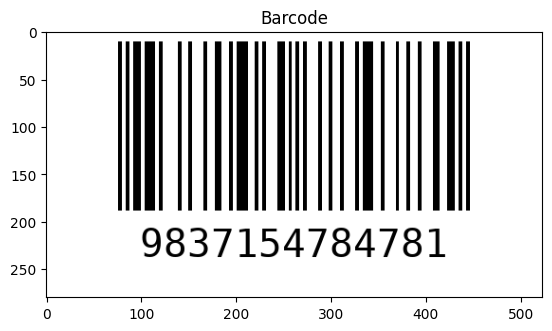

In [ ]:
from barcode import EAN13
from barcode.writer import ImageWriter

# Generate and save the barcode
with open("barcode.png", "wb") as f:
    EAN13("983715478478", writer=ImageWriter()).write(f)

# Read and display the barcode image
barcode = cv2.imread("barcode.png")

plt.imshow(barcode)
plt.title("Barcode")
plt.show()

## 🔳 **QR Code Generation**

Let's create QR Codes using the **qrcode** Python package!

### 📘 What is a QR Code?
A **QR Code** (Quick Response Code) is a type of **2D barcode** that can store information such as:
- Website links 🌐  
- IDs or product details 🏷️  
- App links 📱  
- Text or contact information ✉️  

It was first developed in **1994** in Japan for the automotive industry.

### 🧩 How a QR Code Works
A QR code is made up of **black and white squares** arranged on a grid.  
A camera or scanner reads these squares and, using **error correction**, extracts the stored information—even if the code is slightly damaged.



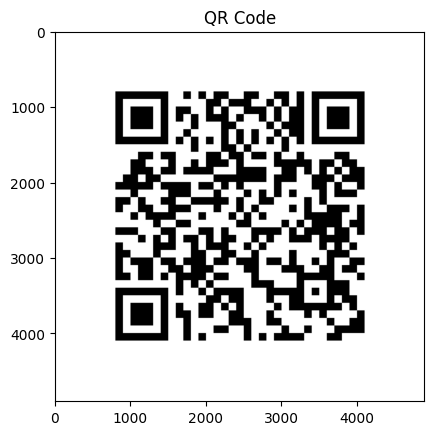

In [ ]:
import qrcode
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Create a QRCode object with custom configuration
qr = qrcode.QRCode(
    version=1,  # Controls the size of the QR code (1 = 21x21 matrix)
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # High error correction (~30% recovery)
    box_size=10,  # Size of each QR box (pixel scaling)
    border=4,  # Thickness of border (minimum recommended is 4)
)

# Add the data (URL/text) to be encoded in the QR code
qr.add_data("https://www.youtube.com/@cvorbit")

# Generate the QR code structure, auto-adjust size if needed
qr.make(fit=True)

# Create the QR code image with black foreground and white background
img = qr.make_image(fill_color="black", back_color="white")

# Save the generated QR code image to disk
img.save("qrcode.png")

qrcode_img = cv2.imread("qrcode.png")

# Display the QR code image using matplotlib
plt.imshow(qrcode_img)
plt.title("QR Code")
plt.axis("off")
plt.show()


## ⚙️ **QR Code Configuration (Made Simple)**

When creating a QR Code, you can adjust a few settings to control its size, quality, and appearance:

### 🔧 Main Parameters
- **version** – Controls how big the QR code is.  
  Values range from **1 to 40**.  
  *Example:* Version 1 = **21 × 21** grid.

- **error_correction** – Decides how much damage or distortion the QR code can handle and still be readable.

- **box_size** – Sets how many pixels each square (box) in the QR code should have.

- **border** – Controls the thickness of the white border around the QR code.  
  The default (and minimum allowed) is **4**.

### 🔍 Error Correction Levels
Higher error correction = QR code can still be read even if part of it is damaged.

- **ERROR_CORRECT_L** – Fixes up to **7%** errors.
- **ERROR_CORRECT_M** – Fixes up to **15%** errors (default).
- **ERROR_CORRECT_Q** – Fixes up to **25%** errors.
- **ERROR_CORRECT_H** – Fixes up to **30%** errors (best protection).


## 🔍 **Reading QR Codes**


In [ ]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
z
# Decode the QR code(s) present in the image
# decode() returns a list of decoded objects
result = decode(img)

# Loop through each detected QR / barcode in the image
for i in result:
    
    # Extract the decoded data (bytes) and convert it to a UTF-8 string
    print(i.data.decode("utf-8"))

https://www.youtube.com/@cvorbit


### 📡 **How to Detect QR Codes**

### 🧪 Example: Detecting and Decoding QR Codes with Pyzbar

The code below loads an image, detects any QR codes in it, draws a bounding box around them, and prints the decoded information on the image.



QR Code revealed: http://appleinsider.com (QRCODE)


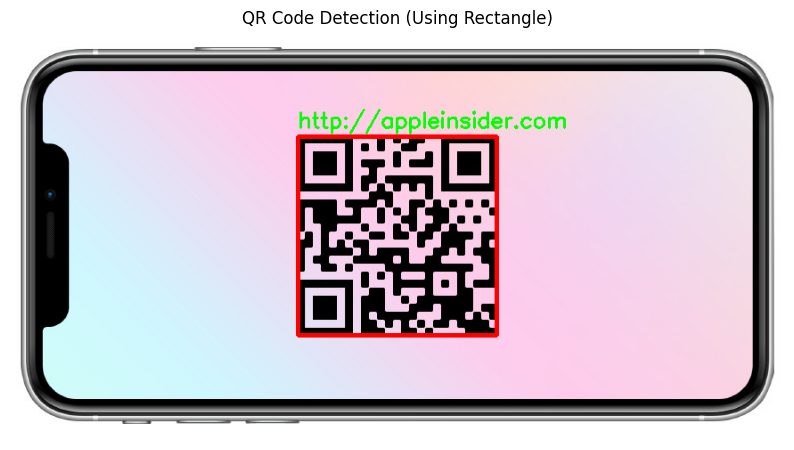

In [20]:
from pyzbar.pyzbar import decode
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("img1.jpg")

# Convert BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect and decode QR codes
codes = decode(image_rgb)

# Loop through detected QR codes
for bc in codes:
    # Get bounding rectangle (x, y, width, height)
    x, y, w, h = bc.rect

    # Draw rectangle around QR code
    cv2.rectangle(
        image_rgb,
        (x, y),
        (x + w, y + h),
        (255, 0, 0),  # Blue rectangle
        3
    )

    # Decode text and type
    barcode_text = bc.data.decode("utf-8")
    barcode_type = bc.type

    # Put decoded text above the rectangle
    cv2.putText(
        image_rgb,
        barcode_text,
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2
    )

    print(f"QR Code revealed: {barcode_text} ({barcode_type})")

# Display output
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("QR Code Detection (Using Rectangle)")
plt.show()
